Insert Title
Insert SH + Date
Webpage saved on desktop



## Problem statement

The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:

* Summarise the history of the box plot and situations in which it used.
* Demonstrate the use of the box plot using data of your choosing.
* Explain any relevant terminology such as the terms quartile and percentile.
* Compare the box plot to alternatives.

# History of the Boxplot

Boxplots were introduced by John Tukey in 1969. John Tukey was a pioneer of computer science, worked in Bell Labs and was a Professor in Princeton University <sup>[1](https://en.wikipedia.org/wiki/Box_plot)</sup>. 

His book, Exploratory Data Analysis, published in 1977, made the data visualisation technique popular. Tukey’s starting point for boxplots was the range-bar, introduced in the 1950's. He added appropriate summary statistics that worked for a wide range of data. The modern view of a boxplot was referred by Tukey as a schematic plot i.e. a box and whiskers plot with some special restrictions on the summary statistics used <sup>[2](http://vita.had.co.nz/papers/boxplots.pdf)</sup>.

The idea of showing median and quartiles as basic summaries pre-dates Tukey and were used by geographers as dispersion diagrams from the late 1930's on. Range bars and whiskers were also in use prior to Tukey. Tukey's version of boxplots was original because of the criteria for identifying points in the tails to be plotted separately and identified as deserving detailed consideration <sup>[3](https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv)</sup>.




# Description of Boxplots

Box Plots are a compact and efficient way to visualise the distribution, variability and dispersion, of data. 

A diagram on how to read a Box Plot <sup>[4](http://visualoop.com/blog/32470/a-look-at-box-plots)</sup> is shown below.

![Reading Box Plot](http://visualoop.com/media/2015/04/box_plot_anatomy.png)


## Median
The median is the middle value in data set. This differs from the mean or average as shown below.

In [97]:
y = (1,4,9,16,25)
print("For y data set the median and mean are:",np.median(y),"and",np.mean(y))

For y data set the median and mean are: 9.0 and 11.0


## Lower Quartile / 25th Percentile / First Quartile / Q1
The first quartile is the middle number between the smallest number, lower extreme in above diagram, and the median of the dataset <sup>[5](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)</sup>.




## Upper Quartile / 75th Percentile / Third Quartile / Q3
The third quartile is the middle value between the median and the highest value, upper extreme in above diagram, of the dataset. <sup>[5](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)</sup>.

## Interquartile Range / IQR
The interquartile range is the range where fifty percent of the data points reside. It is calculated by subtracting the First Quartile from the Third Quartile(Q3-Q1) <sup>[6](https://en.wikipedia.org/wiki/Interquartile_range)</sup>. 




## Whisker
The whisker in a box plot begins at the first or third quartile and terminates 

# Situations where Boxplots used

# Boxplot

# Use of Boxplots

As a hypothetical example of where boxplots could be used, data will be generated to represent times for operations in a coffee shop. Scenario is that 100 customers passed through the coffee shop in an hour. The owner of the coffee shop simulates times, based on prior experience and knowledge, for below operations. The owner's objective is to assess the efficiency of the coffee shop. 

* Customer waiting
* Staff taking orders for coffee and food
* Staff preparing food order
* Staff preparing coffee order
* Serving the customer
* Staff tidying and cleaning the work area

In [98]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np

In [99]:
# waiting simulates the time customers waited before service, uniformly distributed between 3 and 8 minutes.
waiting = np.random.randint(3,8,100)

In [100]:
# order simulates the time for customers order to be taken, uniformly distributed between 1 and 6 minutes. 
order = np.random.randint(1,6,100)

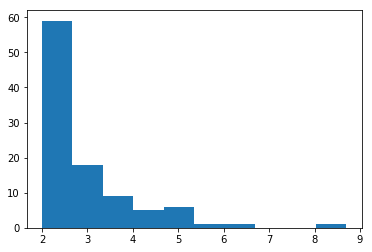

In [101]:
# prep_food simulates the time for staff to prepare customers food. A normal distrubution is used with the values squared
# An offset of 2 is given as this simulates the minimum time of 2 minutes required to prepare food.

prep_food = (np.random.randn(100))**2+2

# Plot histogram to visualise results
plt.hist(prep_food);

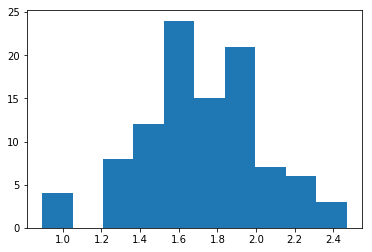

In [102]:
# prep_coffee simulates the time for staff to prepare a coffee.
# Values are drawn from a normal distribution around a mean of 1.7 minutes and standard deviation of 0.3 minutes. 

prep_coffee = np.random.normal(loc=1.7,scale=0.3, size = 100)

# Plot histogram to visualise results
plt.hist(prep_coffee);

In [103]:
serve = np.random.randint(1,6,100)

Over an hour, staff spend 40.3956656574776 minutes cleaning


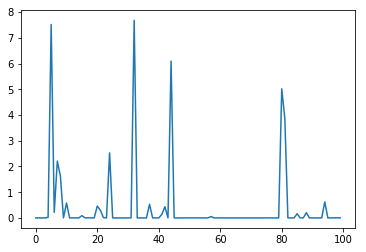

In [104]:
cleaning = (np.random.beta(0.04,5,100))*40
plt.plot(cleaning)
print("Over an hour, staff spend",np.sum(cleaning),"minutes cleaning")

In [105]:
assess = [waiting, order, prep_food, prep_coffee, serve, cleaning]

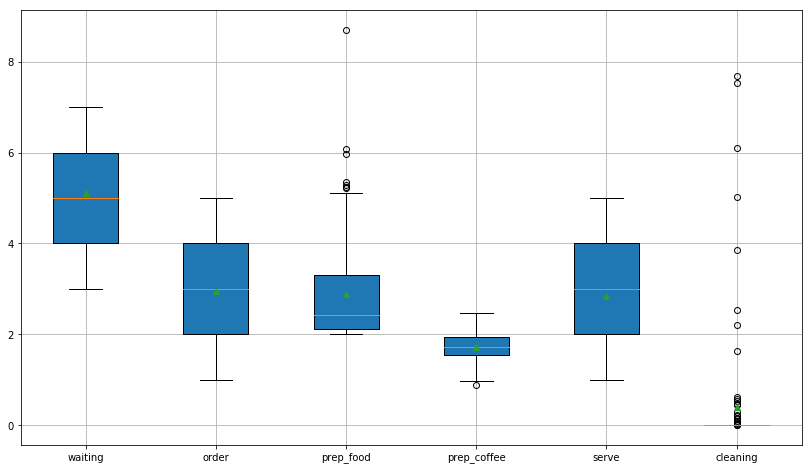

In [106]:

plt.figure(figsize=(14,8))
plt.boxplot(assess, labels = ("waiting", "order", "prep_food", "prep_coffee", "serve", "cleaning"), patch_artist= True, showmeans= True);
plt.grid(True)

# Relevant Terminology

# Alternatives to Boxplots

# References

1. Wikipedia, Box Plot, https://en.wikipedia.org/wiki/Box_plot
2. 40 Years of Boxplots, Hadley Wickham and Lisa Stryjewski, http://vita.had.co.nz/papers/boxplots.pdf
3. StackExchange, History of Boxplots, https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv
4. Visualoop, http://visualoop.com/blog/32470/a-look-at-box-plots
5. Understanding Boxplots, https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
6. Wikipedia, Interquartile Range, https://en.wikipedia.org/wiki/Interquartile_range
